In [68]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

plt.style.use('seaborn-v0_8')


In [2]:
!ls

main.ipynb  test_mtp.cfg  test_vasp.cfg


In [28]:
def parse_cfg(file):

    with open(file) as f:
        add_line = False
        add_energy = False
        add_supercell = False
        add_size = False
        size = 0
        
        data = []
        frame = []
        energies = []
        supercell = []
        supercells = []
        sizes = []
        
        for line in f.readlines():
            
            
            if 'Energy'      in line: 
                add_line = False
                data.append(frame)
                frame = []
                
            if 'AtomData:'   in line:
                add_supercell = False
                supercells.append(supercell)
                supercell = []
                
                
            if add_line: 
                frame.append(list(map(float, line.split() ) ))
                
            if add_supercell:
                supercell.append(list(map(float, line.split())))    
            
            if add_energy: 
                energies.append(float(line))
                add_energy = False
                
            if add_size:
                sizes.append(float(line))
                add_size = False
            
            if 'Size'        in line: add_size = True
            if 'Energy'      in line: add_energy = True
            if 'Supercell'   in line: add_supercell = True
            if 'AtomData:'   in line: add_line = True
    
    sizes = np.array(sizes)            
    energies = np.array(energies)
    energies_per_atom = energies / sizes
    data = [np.array(x)[:, -3:].flatten() for x in data]
    supercells = np.array(supercells) 
    
    
    return (energies_per_atom, data, supercells)


energies_vasp_train, data_vasp_train, _ = parse_cfg('train_vasp.cfg')
energies_mtp_train, data_mtp_train, _ = parse_cfg('train_mtp.cfg')

energies_vasp_test, data_vasp_test, _ = parse_cfg('test_vasp.cfg')
energies_mtp_test, data_mtp_test, _ = parse_cfg('test_mtp.cfg')

forces_vasp_train = np.hstack(data_vasp_train)
forces_mtp_train = np.hstack(data_mtp_train)

forces_vasp_test = np.hstack(data_vasp_test)
forces_mtp_test = np.hstack(data_mtp_test)

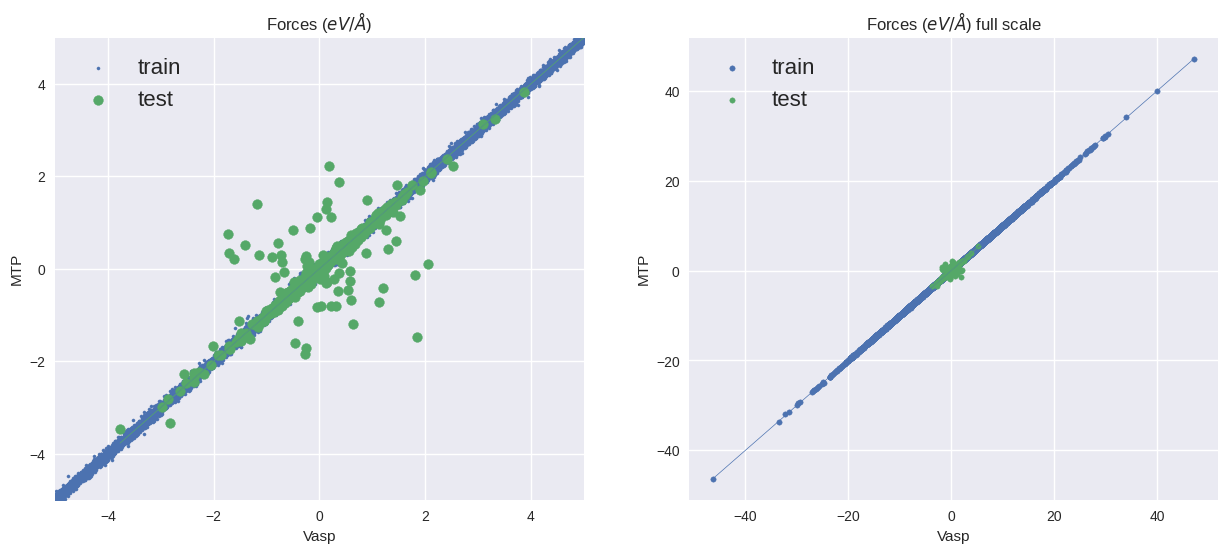

In [60]:

fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

axs[0].plot(sorted(forces_vasp_train), sorted(forces_vasp_train), linewidth=0.5)
axs[0].scatter(forces_vasp_train, forces_mtp_train, label='train', s=5);

axs[0].plot(sorted(forces_vasp_test), sorted(forces_vasp_test), linewidth=0.5)
axs[0].scatter(forces_vasp_test, forces_mtp_test, label='test');

axs[0].set_title('Forces ($eV / \\AA$)')
axs[0].legend(fontsize=16)
axs[0].set_ylabel('MTP')
axs[0].set_xlabel('Vasp');

lims = [-5, 5]
axs[0].set_xlim(lims)
axs[0].set_ylim(lims);

axs[1].plot(sorted(forces_vasp_train), sorted(forces_vasp_train), linewidth=0.5)
axs[1].scatter(forces_vasp_train, forces_mtp_train, label='train', s=15);

axs[1].plot(sorted(forces_vasp_test), sorted(forces_vasp_test), linewidth=0.5)
axs[1].scatter(forces_vasp_test, forces_mtp_test, label='test', s=15);

axs[1].set_title('Forces ($eV / \\AA$) full scale')
axs[1].legend(fontsize=16)
axs[1].set_ylabel('MTP')
axs[1].set_xlabel('Vasp');


# r2 = r2_score(energies_mtp, energies_vasp)

In [70]:
print(  ' R2:\t', r2_score(forces_mtp_test, forces_vasp_test), '\n',
        'RMSE:\t', RMSE(forces_mtp_test, forces_vasp_test), '\n',
        'MAE:\t', MAE(forces_mtp_test, forces_vasp_test), '\n',
        'MAPE:\t', MAPE(forces_mtp_test, forces_vasp_test))

 R2:	 0.8302301014145254 
 RMSE:	 0.2834169640113911 
 MAE:	 0.08443476583333333 
 MAPE:	 0.5796207181317418
